In [1]:
import pandas as pd
import numpy as np
from itertools import product

In [35]:
hardware = ["amd", "intel"]
lexers = ["simdlex (this paper)", "Mateuszd6/simd-lexing", "gcc", "chibicc"]
files= ["gcc", "oggenc", "gzip"]

df = pd.read_csv('data/time.csv')
avg_time = {h: {l: {} for l in lexers} for h in hardware}

for h, l, f in product(hardware, lexers, files):
    avg_time[h][l][f] = df.loc[(df['Hardware'] == h) & (df['Lexer'] == l) & (df['File'] == f), 'Time (ms)'].mean()

# Plots
---

In [18]:
from random import uniform
import matplotlib.pyplot as plt

colors = ["#508CA4", "#393A3B", "#BF694E", "#FFBA08"]

def get_throughput(size, time):
    throughput = (size / 1024) / (time / 1000)
    return throughput

def plot_speed_per_size(sizes, times):
    times = [get_throughput(x, y) for x, y in zip(sizes, times) if x != 0 and x !=0]
    print(times)

    # Create the plot
    plt.plot(sizes, times, marker='', linestyle='-', color=colors[0])

    # Labeling the axes
    plt.xlabel('Input size (KB)')
    plt.ylabel('Throughput (MB/s)')

    # Set the y-limit
    plt.ylim(bottom=0)

    # Show the plot
    plt.show()

{'gcc': 95.92923, 'oggenc': 1.710652, 'gzip': 6.9373}


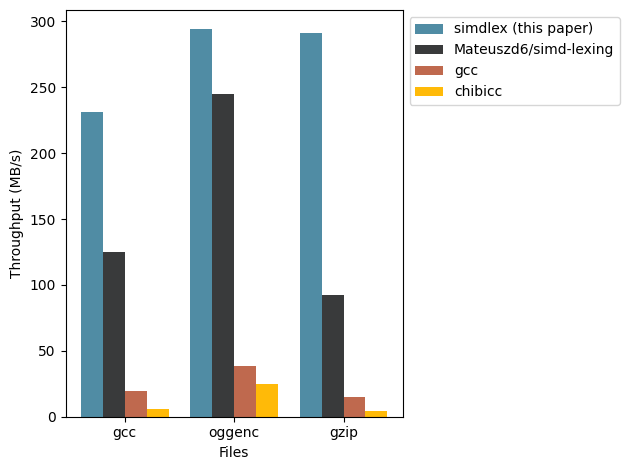

In [40]:
def plot_throughput(h, times=avg_time, lexers=lexers, files=files, colors=colors):
    througputs = {}
    
    file_sizes = {}
    file_sizes_df = pd.read_csv('data/files.csv')
    for index, row in file_sizes_df.iterrows():
        file_sizes[row['File']] = row['Size']

    print(avg_time['amd']['simdlex (this paper)'])

    for l in lexers:
        # TODO: get size
        througputs[l] = [get_throughput(file_sizes[x], avg_time[h][l][x]) for x in times[h][l]]   

    # Calculate bars
    bar_width = 0.2
    bar_positions = [[] for _ in range(len(lexers))]
    bar_positions[0] = np.arange(len(througputs[lexers[0]]))

    for i in range(1, len(lexers)):
        bar_positions[i] = [x + bar_width * i for x in bar_positions[0]]

    plt.figure(figsize=(12, 6))

    for i in range(len(lexers)):
        l = lexers[i]
        plt.bar(    
            bar_positions[i],
            throughputs[l],
            color=colors[i],
            width=bar_width,
            label=l
        )

    # Calculate the tick positions
    tick_positions = (bar_positions[0] + bar_positions[1]) / 2
    plt.xticks(tick_positions, files)

    plt.ylabel('Throughput (MB/s)')
    plt.xlabel('Files')
    plt.title('Throughput Comparison by Lexer')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside plot
    plt.tight_layout()  # Adjust layout to fit elements
    plt.show()

    pass

plot_throughput("amd")

[2.343314034598214, 55.3651289506392, 86.19853428431918, 127.16087135108742, 150.70380234136815, 103.22702342066272, 120.63080409787734, 142.60527375456576, 128.26406827536962, 164.8163654395109, 144.25259010464538, 147.24475996834892, 130.53674492046986, 142.43264129196385, 114.68797008971318, 131.25828334263392, 151.38991085099585, 131.9012482552418, 149.9221680012155, 154.16620876589874, 152.7610642220968, 168.63427879313366, 160.71970869855184, 168.70008995597112, 169.76742889618708, 181.75843236543577, 172.52853651086994, 177.92308304788742, 179.07839005202757, 191.28482233628338, 171.20325676748686, 187.31960074935026, 173.8808054810686, 174.51089003990435, 173.83887906123348, 191.2918918602721, 181.57461144601348, 173.91168732748423, 210.45740200257342, 199.88852032160358, 198.19853735751795, 197.7691650390625, 191.4405539344005, 184.15988331109708, 206.54631681763067, 206.49029876075087, 198.6340114048549, 172.9710896809896, 185.517349628487, 182.89926889780406, 202.20899206446

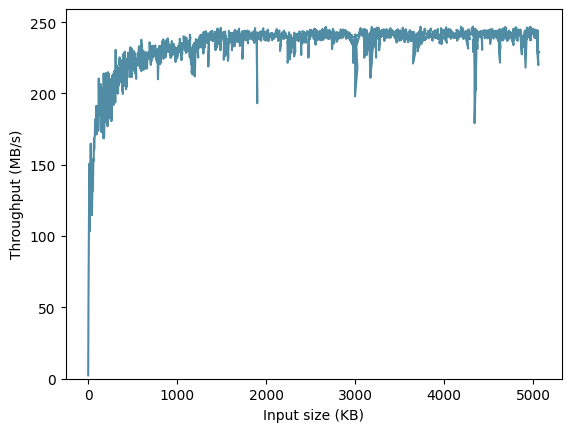

In [19]:
# Read the CSV file
df = pd.read_csv('results.csv')

# Extract the file size and speed columns as arrays
file_size = df['File Size'].values
speed = df['Time'].values

# Call the plot_speed_per_size function
plot_speed_per_size(file_size, speed)

## AMD

In [ ]:
plot_throughput("amd")

## Intel

In [ ]:
plot_throughput("intel")